### Classification

In [1]:
# Using MNIST Data to predict the digit (predict Class -classification problem)
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)#(data has 784 features)
mnist.keys() # display all the list of the keys in the dictionary

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
#DESCR is describing the dataset
#data key containing an array with one row per instance and one column per features
#target key containing an array with the labels
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

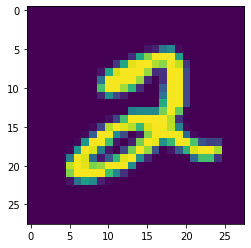

In [8]:
#Display a digit
import matplotlib.pyplot as plt
random_digit=X[5]
#reshape to 28X28 array
random_digit=random_digit.reshape(28,28)
plt.imshow(random_digit)

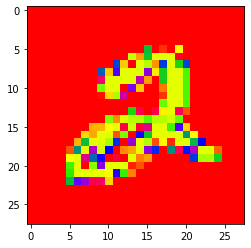

In [10]:
#with different color
plt.imshow(random_digit,cmap='prism')

In [23]:
#Create Test set and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [25]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(random_state=42)
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
pred=clf.predict(X_test)

In [19]:
#check the performance
from sklearn.model_selection import  cross_val_score
cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.88052381, 0.8707619 , 0.87790476])

In [49]:
#other method Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,pred)
print(cf)

[[82 77 53 62 79 56 55 71 88 70]
 [97 85 69 90 93 87 86 67 77 67]
 [66 84 63 72 77 69 70 74 67 79]
 [63 72 72 77 73 52 64 77 96 75]
 [77 66 52 55 88 52 59 55 80 79]
 [54 84 65 61 77 62 45 68 70 60]
 [76 73 50 81 76 64 72 60 85 62]
 [62 93 54 87 80 52 65 57 99 61]
 [56 89 60 70 63 52 64 52 81 64]
 [68 85 51 53 71 65 73 73 84 55]]


In [37]:
#precision and recall
from sklearn.metrics import  precision_score,recall_score
precision_score(y_test,pred,  average='micro')

0.10314285714285715

In [38]:
recall_score(y_test,pred,  average='micro')

0.10314285714285715

In [40]:
random_digit_1=X[5]
y_score=clf.decision_function([random_digit_1])
y_score

array([[-22213.88839759, -37752.37166402,  19878.94226359,
         -9532.27652742, -22255.81685543,  -5361.44817002,
        -24512.23615344, -26867.56593048,   -911.69494036,
         -8683.87209626]])

In [46]:
y_score=cross_val_predict(clf,X_train,y_train,cv=3,method="decision_function")

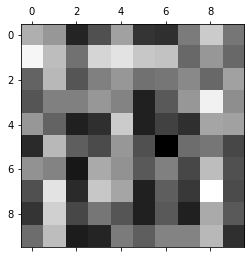

In [53]:
plt.matshow(cf, cmap=plt.cm.gray)
plt.show()